Image shape (1080, 1920, 3)


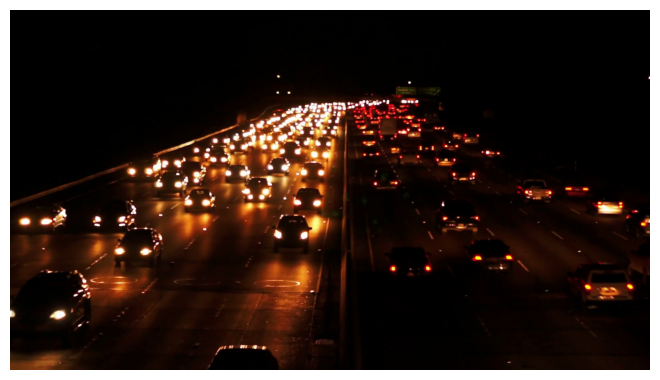

In [1]:
import requests
from io import BytesIO
from imageio.v3 import imread
import matplotlib.pyplot as plt

test_image_url = 'https://dm0qx8t0i9gc9.cloudfront.net/thumbnails/video/Vd3bj2jPe/night-traffic-on-autobahn-night-city-road_vkqxllatl_thumbnail-1080_01.png'

url_content = requests.get(test_image_url).content
input_image = imread(BytesIO(url_content))

def plot_image(image, cmap='gray'):
    # Display the image using Matplotlib's imshow function
    plt.imshow(image, cmap=cmap)
    
    # Remove axis labels and ticks
    plt.gca().set_axis_off()
    
    # Adjust subplot parameters to remove unnecessary white space
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    
    # Show the plot
    plt.show()

print(f'Image shape {input_image.shape}')
plot_image(input_image, cmap=None)

Grayscale shape (1080, 1920)


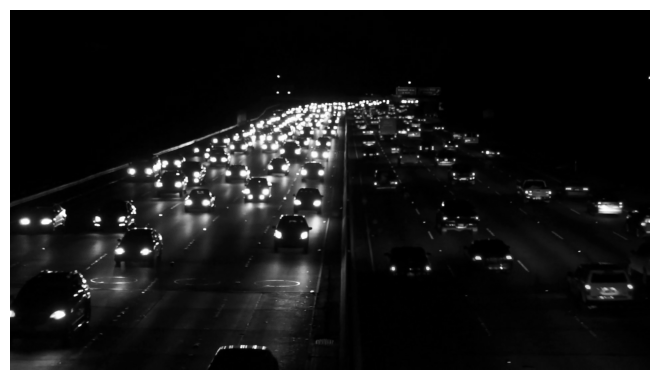

In [2]:
def convert_to_grayscale(image):
    # Convert the image to grayscale using Rec.ITU-R BT.601-7 formula
    # Y = 0.2989 * R + 0.5870 * G + 0.1440 * B
    return 0.2989 * image[:, :, 0] + 0.5870 * image[:, :, 1] + 0.1440 * image[:, :, 2]

grayscale_image = convert_to_grayscale(input_image)

print(f'Grayscale shape {grayscale_image.shape}')
plot_image(grayscale_image)

In [3]:
from scipy.signal import convolve2d

class Filter():
    def __init__(self, type, size) -> None:
        self.size = size
        self.type = type

    def __str__(self):
        return f'{self.type} filter [{self.size}x{self.size}]'
    
    def apply(self, image):
        return convolve2d(image, self._kernels[self.size],
                          boundary='symm', mode='same')

Cropped image shape (130, 170)


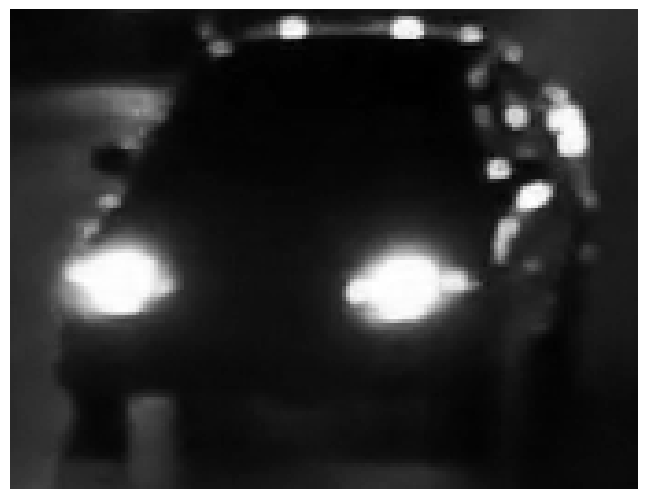

In [4]:
cropped_image = grayscale_image[650:780, 300:470]
print(f"Cropped image shape {cropped_image.shape}")
plot_image(cropped_image)

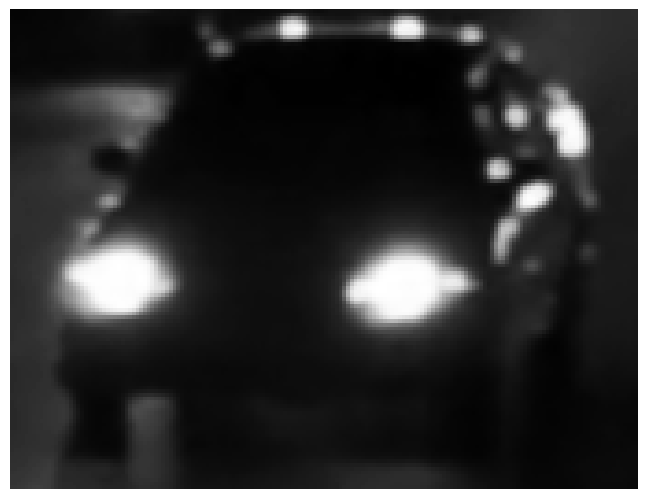

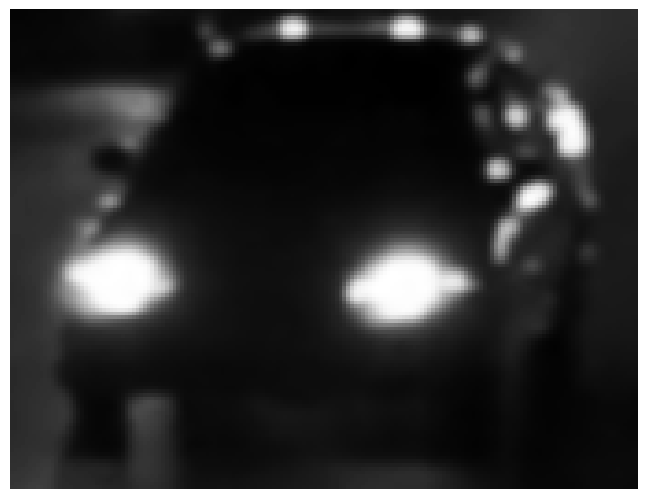

In [5]:
import numpy as np

class Gaussian(Filter):
    _kernels = {
        3: 0.0625 * np.array([
                    [   1,  2,  1],
                    [   2,  4,  2],
                    [   1,  2,  1]
                ], dtype=np.float32),
        5: 0.003663004 * np.array([
                    [   1,  4,  7,  4,  1],
                    [   4, 16, 26, 16,  4],
                    [   7, 26, 41, 26,  7],
                    [   4, 16, 26, 16,  4],
                    [   1,  4,  7,  4,  1],
                ], dtype=np.float32)
    }
    
    def __init__(self, size = 3):
        super().__init__(type = 'Gaussian', size = size)

image_filter = Gaussian(size = 3)
plot_image(image_filter.apply(cropped_image))

image_filter = Gaussian(size = 5)
plot_image(image_filter.apply(cropped_image))


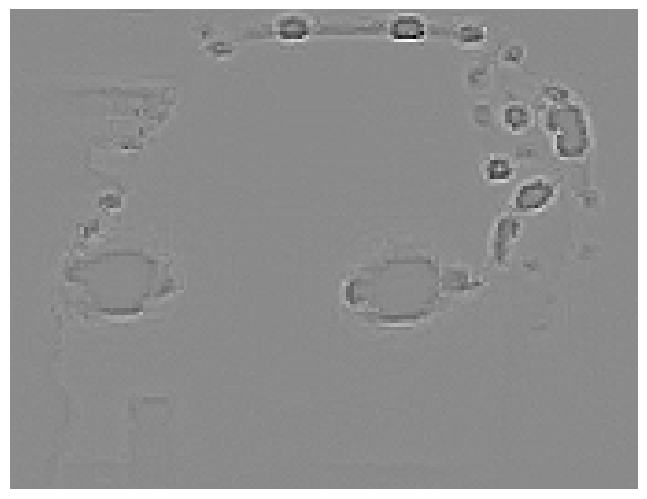

In [6]:
class Laplacian(Filter):
    _kernels = {
        3: np.array([
                    [   0,  1,  0],
                    [   1, -4,  1],
                    [   0,  1,  0]
                ], dtype=np.float32),
    }
    
    def __init__(self, size = 3):
        super().__init__(type = 'Laplacian', size = size)

image_filter = Laplacian(size = 3)
plot_image(image_filter.apply(cropped_image))

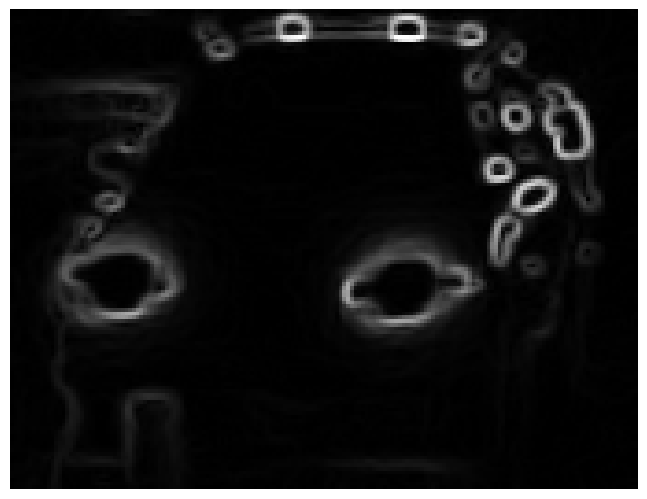

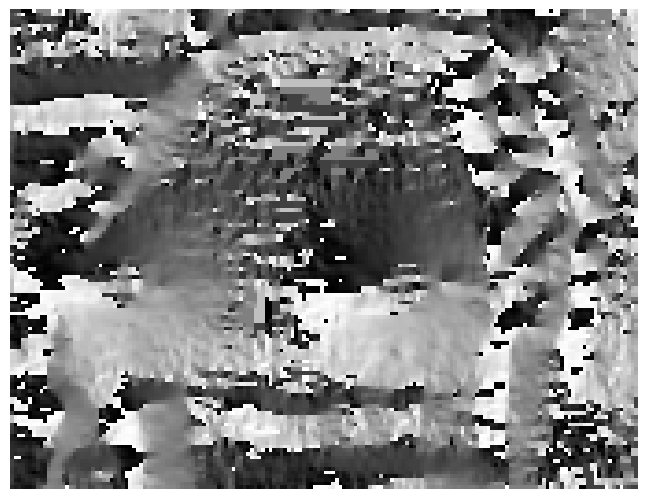

In [7]:
from math import pi

class Sobel(Filter):
    _kernels = {
        'x': np.array([
                    [  -1,  0,  1],
                    [  -2,  0,  2],
                    [  -1,  0,  1]
                ], dtype=np.float32),
        'y': np.array([
                    [  -1, -2, -1],
                    [   0,  0,  0],
                    [   1,  2,  1]
                ], dtype=np.float32),
    }
    
    def __init__(self, size = 3):
        super().__init__(type = 'Sobel', size = size)

    def apply(self, image):
        dx = convolve2d(image, self._kernels['x'], boundary='symm', mode='same')
        dy = convolve2d(image, self._kernels['y'], boundary='symm', mode='same')

        mag = np.sqrt(dx**2 + dy**2)
        ang = np.arctan2(dy, dx) * 180 / pi

        return mag, ang

image_filter = Sobel()
plot_image(image_filter.apply(cropped_image)[0])
plot_image(image_filter.apply(cropped_image)[1])